In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
#grab datafile using pandas
dataFrame = pd.read_csv("yeast.data", delim_whitespace=1, names=["mcg","gvh","alm","mit","erl","pox","vac","nuc","class"])


#outlier detection using Isolation Forest:
df = dataFrame.drop(columns="class")
dfOnlyClasses = dataFrame.drop(columns=["mcg","gvh","alm","mit","erl","pox","vac","nuc"])
IF = IsolationForest(n_estimators=8)
IF.fit(df)
#negative values are outliers

#find outliers and remove them
count = 0
IFlen = []
for x in IF.predict(df):
    if x < 0 and count < len(df):
        df = df.drop(df.index[count])
        dfOnlyClasses = dfOnlyClasses.drop(dfOnlyClasses.index[count])
        IFlen.append(x)
    count = count + 1


#outlier dectection using one-class SVM
OCSVM = OneClassSVM(gamma='auto').fit(dataFrame.drop(columns="class"))
#negative values are outliers
outliersWithOCSVM = [x for x in OCSVM.predict(dataFrame.drop(columns="class")) if x < 0]
print('amount of outliers using Isolation Forest:')
print(len(IFlen))
print('amount of outliers using one-class SVM:')
print(len(outliersWithOCSVM))

C:\Users\hhh\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\hhh\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\hhh\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


amount of outliers using Isolation Forest:
127
amount of outliers using one-class SVM:
741


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 802 samples, validate on 90 samples
Epoch 1/150
802/802 [==============================] - 0s 192us/step - loss: 0.1382 - accuracy: 0.2232 - val_loss: 0.0905 - val_accuracy: 0.2778
Epoch 2/150
802/802 [==============================] - 0s 55us/step - loss: 0.0844 - accuracy: 0.2968 - val_loss: 0.0826 - val_accuracy: 0.2778
Epoch 3/150
802/802 [==============================] - 0s 60us/step - loss: 0.0811 - accuracy: 0.2718 - val_loss: 0.0813 - val_accuracy: 0.2778
Epoch 4/150
802/802 [==============================] - 0s 55us/step - loss: 0.0801 - accuracy: 0.2880 - val_loss: 0.0810 - val_accuracy: 0.2778
Epoch 5/150
802/802 [==============================] - 0s 64us/step - loss: 0.0796 - accuracy: 0.2968 - val_loss: 0.0820 - val_accuracy: 0.1889
Epoch 6/150
802/802 [==============================] - 0s 36us/step - loss: 0.0798 - accuracy: 0.2606 - val_loss: 

802/802 [==============================] - 0s 34us/step - loss: 0.0784 - accuracy: 0.2893 - val_loss: 0.0799 - val_accuracy: 0.2778
Epoch 110/150
802/802 [==============================] - 0s 31us/step - loss: 0.0786 - accuracy: 0.2855 - val_loss: 0.0800 - val_accuracy: 0.3000
Epoch 111/150
802/802 [==============================] - 0s 34us/step - loss: 0.0784 - accuracy: 0.2955 - val_loss: 0.0799 - val_accuracy: 0.2778
Epoch 112/150
802/802 [==============================] - 0s 31us/step - loss: 0.0786 - accuracy: 0.2968 - val_loss: 0.0803 - val_accuracy: 0.1889
Epoch 113/150
802/802 [==============================] - 0s 32us/step - loss: 0.0790 - accuracy: 0.2731 - val_loss: 0.0801 - val_accuracy: 0.2778
Epoch 114/150
802/802 [==============================] - 0s 32us/step - loss: 0.0787 - accuracy: 0.2968 - val_loss: 0.0798 - val_accuracy: 0.2778
Epoch 115/150
802/802 [==============================] - 0s 30us/step - loss: 0.0785 - accuracy: 0.2930 - val_loss: 0.0798 - val_accuracy:

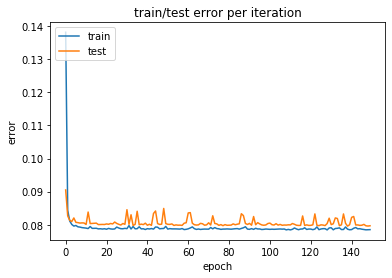

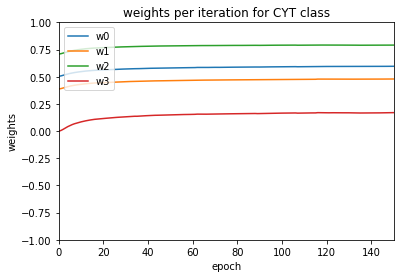

In [2]:

#import what's needed to build ann
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#encode classes using one hot encoder:
enc = OneHotEncoder()
enc.fit(dfOnlyClasses)
OneHotEncoder(categorical_features=None, categories=None, drop=None, handle_unknown='ignore', n_values=None)
y = enc.transform(dfOnlyClasses).toarray()

import numpy as np
np.set_printoptions(threshold=np.inf)
y = np.array(y)
#split data into training and testing:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.34, random_state=42)
#print(X_train) #test
#build ann model using keras:
model = Sequential()
model.add(Dense(3, activation='sigmoid', input_dim=8))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
#comile the model:
from keras.optimizers import SGD
opt = SGD(lr=10)
model.compile(
  optimizer=opt,
  loss='mean_squared_error',
  metrics=['accuracy'],
)
weights_history = []
_biases= []
# A custom callback to get weights for plotting
class MyCallback(keras.callbacks.Callback):
    def on_batch_end(self, batch, logs):
        weights = model.get_weights()[0]
        biases = model.get_weights()[1]
        w1,w2,w3,w4,w5,w6,w7,w8 = weights
        w01,w02,w03 = biases
        biases = [w01]
        weights = [w1[0], w2[0], w3[0]]
        weights_history.append(weights)
        _biases.append(biases)

#create checkpoint for plot, to grab val_loss
callback = MyCallback()
filepath="weights-improvement-{epoch:04d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint]

#fit the model with training set:
history = model.fit(
  X_train,
  y_train,
  epochs=150,
  batch_size=100, 
  verbose=1,
  validation_split=0.1,
  callbacks=[callback]
)

#test model using training set:
loss, accuracy = model.evaluate(
  X_test,
  y_test
)
print('Loss: %.2f' % loss)
print("Accuracy %.2f" %(accuracy))
model.save_weights('model.h5')
#get weights and biases from output layer for problem #4:
from tensorflow.contrib.keras import layers
output_layer_weights_lastLayer = model.layers[2].get_weights()[0]
output_layer_weights_secondtolastlayer  = model.layers[1].get_weights()[0]
output_layer_biases_lastLayer = model.layers[2].get_weights()[1]
output_layer_biases_secondtolastlayer  = model.layers[1].get_weights()[1]
print("output_layer_weights_lastLayer: ")
print(output_layer_weights_lastLayer) #test
print("output_layer_weights_secondtolastLayer: ")
print(output_layer_weights_secondtolastlayer) #test
print("output_layer_biases_lastLayer: ")
print(output_layer_biases_lastLayer) #test
print("output_layer_biases_secondtolastLayer: ")
print(output_layer_biases_secondtolastlayer) #test

import matplotlib.pyplot as plt
#plot the training and testing error:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train/test error per iteration')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plot the weights for CYT class:
plt.axis([0, 150, -1, 1])
plt.plot(weights_history)
plt.plot(_biases)
plt.title('weights per iteration for CYT class')
plt.ylabel('weights')
plt.xlabel('epoch')
plt.legend(['w0','w1', 'w2','w3'], loc='upper left')
plt.show()











In [3]:

#create df including all data as stated in directions
dataFrameWithAllData = pd.read_csv("yeast.data", delim_whitespace=1, names=["mcg","gvh","alm","mit","erl","pox","vac","nuc","class"])
dfe = dataFrameWithAllData.drop(columns="class")
#grab classes for model:
cdfe = dataFrameWithAllData.drop(columns=["mcg","gvh","alm","mit","erl","pox","vac","nuc"])

#use new one hot encoder for new y column vector
from sklearn.preprocessing import LabelEncoder
#label encode for decoding later:
l = LabelEncoder()
e = l.fit_transform(cdfe)
#use one hot encoder to encode classes, this time without removing data as instructed

newenc = OneHotEncoder()
newenc.fit(cdfe)
OneHotEncoder(categorical_features=None, categories=None, drop=None, handle_unknown='ignore', n_values=None)
y = enc.transform(cdfe).toarray()
#turn into numpy array
y = np.array(y)
#create counter 
it=1
#create empty list to append argmax's to, basically what index 1 lands on from ohe
f = []
#decodes on hot encoder: 
#create a list of indexes to decode
for i in y:
    f.append(np.argmax(i))
#reset counter:
it = 1
#decode and print, this will show you my encoded classes
#what row you are on, and the decoded class
for j in l.inverse_transform(f):
    print(it, end =" ")
    print(y[it-1])
    print(j)
    it = it + 1
#Train model with all data
#it will show less in model because I am using 0.1 for validation
history = model.fit(
  dfe,
  y,
  epochs=150,
  batch_size=100, 
  verbose=1,
  validation_split=0.1
)
#now get training error, to do this I run model with training data, in this case it is all the data
loss, accuracy = model.evaluate(dfe,y)
print("acc: ")
print(accuracy)

C:\Users\hhh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
2 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
3 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
4 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
5 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
6 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
7 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
8 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
9 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
10 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
11 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
12 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
13 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
14 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
15 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
16 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
17 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
18 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
19 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
20 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
21 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
22 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
23 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
24 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
25 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
26 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

NUC
408 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
409 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
410 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
411 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ME3
412 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
413 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
414 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
415 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ME3
416 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ME3
417 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
418 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
419 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
420 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
421 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
422 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
423 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
424 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ME3
425 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
ME1
426 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
427 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
428 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
429 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
430 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
431 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
432 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


741 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
742 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
743 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ME3
744 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
745 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
746 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
ME1
747 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
VAC
748 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
VAC
749 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
VAC
750 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
VAC
751 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
VAC
752 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
753 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
754 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
755 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
756 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
757 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
758 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
759 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
760 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
761 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
762 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
763 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
764 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
765 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT


1074 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
1075 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
1076 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
1077 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
ME1
1078 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ME3
1079 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ME3
1080 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
1081 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
1082 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
1083 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
1084 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
1085 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
VAC
1086 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
ME1
1087 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
1088 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
MIT
1089 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
1090 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
ME2
1091 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
1092 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
1093 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
1094 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
1095 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
1096 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
1097 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
1098 [0. 0. 0. 0

1407 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ME3
1408 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ME3
1409 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
ME1
1410 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
1411 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
EXC
1412 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ME3
1413 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
1414 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ME3
1415 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
1416 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CYT
1417 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ME3
1418 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ME3
1419 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
1420 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ME3
1421 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
EXC
1422 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ME3
1423 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
1424 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
ME1
1425 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ME3
1426 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
NUC
1427 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ME3
1428 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ME3
1429 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ME3
1430 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ME3
1431 [0. 0. 0. 0

Epoch 35/150
1335/1335 [==============================] - 0s 30us/step - loss: 0.0756 - accuracy: 0.3281 - val_loss: 0.0909 - val_accuracy: 0.1879
Epoch 36/150
1335/1335 [==============================] - 0s 22us/step - loss: 0.0756 - accuracy: 0.3243 - val_loss: 0.0911 - val_accuracy: 0.1678
Epoch 37/150
1335/1335 [==============================] - 0s 22us/step - loss: 0.0755 - accuracy: 0.3184 - val_loss: 0.0915 - val_accuracy: 0.1678
Epoch 38/150
1335/1335 [==============================] - 0s 19us/step - loss: 0.0755 - accuracy: 0.3184 - val_loss: 0.0913 - val_accuracy: 0.1678
Epoch 39/150
1335/1335 [==============================] - 0s 16us/step - loss: 0.0755 - accuracy: 0.3154 - val_loss: 0.0920 - val_accuracy: 0.1678
Epoch 40/150
1335/1335 [==============================] - 0s 17us/step - loss: 0.0754 - accuracy: 0.3251 - val_loss: 0.0915 - val_accuracy: 0.1678
Epoch 41/150
1335/1335 [==============================] - 0s 16us/step - loss: 0.0753 - accuracy: 0.3341 - val_loss: 0

Epoch 91/150
1335/1335 [==============================] - 0s 17us/step - loss: 0.0696 - accuracy: 0.4202 - val_loss: 0.0896 - val_accuracy: 0.2416
Epoch 92/150
1335/1335 [==============================] - 0s 17us/step - loss: 0.0695 - accuracy: 0.4412 - val_loss: 0.0891 - val_accuracy: 0.2215
Epoch 93/150
1335/1335 [==============================] - 0s 18us/step - loss: 0.0694 - accuracy: 0.4292 - val_loss: 0.0916 - val_accuracy: 0.2148
Epoch 94/150
1335/1335 [==============================] - 0s 16us/step - loss: 0.0695 - accuracy: 0.4187 - val_loss: 0.0928 - val_accuracy: 0.2550
Epoch 95/150
1335/1335 [==============================] - 0s 17us/step - loss: 0.0694 - accuracy: 0.4255 - val_loss: 0.0899 - val_accuracy: 0.2215
Epoch 96/150
1335/1335 [==============================] - 0s 16us/step - loss: 0.0693 - accuracy: 0.4337 - val_loss: 0.0890 - val_accuracy: 0.2282
Epoch 97/150
1335/1335 [==============================] - 0s 18us/step - loss: 0.0693 - accuracy: 0.4270 - val_loss: 0

In [4]:

X_train= np.array(X_train)
def createModel(i,j):
    modelSearch = Sequential()
    for nodes in range(0,j+1):
        modelSearch.add(Dense(i, activation='sigmoid'))
    modelSearch.add(Dense(10, activation='sigmoid'))
    modelSearch.compile(
      optimizer=opt,
      loss='mean_squared_error',
      metrics=['accuracy'],
    )
    modelSearch.fit(
      X_train,
      y_train,
      epochs=150,
      batch_size=100
    )
    loss, accuracy = modelSearch.evaluate(
      X_test,
      y_test
    )
    print('Loss: %.2f' % loss)
    print("Accuracy %.2f" %(accuracy))
for i in range(1,4):
    for j in range(3,13):
        if(j%3 == 0):
            createModel(i,j)

Epoch 1/150
892/892 [==============================] - 0s 158us/step - loss: 0.1583 - accuracy: 0.2814
Epoch 2/150
892/892 [==============================] - 0s 24us/step - loss: 0.0950 - accuracy: 0.2848
Epoch 3/150
892/892 [==============================] - 0s 27us/step - loss: 0.0858 - accuracy: 0.2904
Epoch 4/150
892/892 [==============================] - 0s 25us/step - loss: 0.0828 - accuracy: 0.2948
Epoch 5/150
892/892 [==============================] - 0s 29us/step - loss: 0.0814 - accuracy: 0.2948
Epoch 6/150
892/892 [==============================] - 0s 24us/step - loss: 0.0805 - accuracy: 0.2948
Epoch 7/150
892/892 [==============================] - 0s 29us/step - loss: 0.0801 - accuracy: 0.2803
Epoch 8/150
892/892 [==============================] - 0s 29us/step - loss: 0.0798 - accuracy: 0.2803
Epoch 9/150
892/892 [==============================] - 0s 30us/step - loss: 0.0795 - accuracy: 0.2848
Epoch 10/150
892/892 [==============================] - 0s 27us/step - loss: 0.07

892/892 [==============================] - 0s 20us/step - loss: 0.0797 - accuracy: 0.2948
Epoch 8/150
892/892 [==============================] - 0s 19us/step - loss: 0.0794 - accuracy: 0.2881
Epoch 9/150
892/892 [==============================] - 0s 19us/step - loss: 0.0793 - accuracy: 0.2814
Epoch 10/150
892/892 [==============================] - 0s 18us/step - loss: 0.0791 - accuracy: 0.2915
Epoch 11/150
892/892 [==============================] - 0s 18us/step - loss: 0.0791 - accuracy: 0.2814
Epoch 12/150
892/892 [==============================] - 0s 20us/step - loss: 0.0790 - accuracy: 0.2948
Epoch 13/150
892/892 [==============================] - 0s 18us/step - loss: 0.0789 - accuracy: 0.2814
Epoch 14/150
892/892 [==============================] - 0s 18us/step - loss: 0.0788 - accuracy: 0.2803
Epoch 15/150
892/892 [==============================] - 0s 19us/step - loss: 0.0788 - accuracy: 0.2948
Epoch 16/150
892/892 [==============================] - 0s 20us/step - loss: 0.0788 - ac

892/892 [==============================] - 0s 22us/step - loss: 0.0788 - accuracy: 0.2848
Epoch 15/150
892/892 [==============================] - 0s 22us/step - loss: 0.0788 - accuracy: 0.2735
Epoch 16/150
892/892 [==============================] - 0s 22us/step - loss: 0.0788 - accuracy: 0.2960
Epoch 17/150
892/892 [==============================] - 0s 21us/step - loss: 0.0788 - accuracy: 0.2769
Epoch 18/150
892/892 [==============================] - 0s 19us/step - loss: 0.0787 - accuracy: 0.2892
Epoch 19/150
892/892 [==============================] - 0s 20us/step - loss: 0.0787 - accuracy: 0.2825
Epoch 20/150
892/892 [==============================] - 0s 20us/step - loss: 0.0787 - accuracy: 0.2848
Epoch 21/150
892/892 [==============================] - 0s 21us/step - loss: 0.0787 - accuracy: 0.2825
Epoch 22/150
892/892 [==============================] - 0s 20us/step - loss: 0.0787 - accuracy: 0.2948
Epoch 23/150
892/892 [==============================] - 0s 21us/step - loss: 0.0786 - 

892/892 [==============================] - 0s 25us/step - loss: 0.0787 - accuracy: 0.2960
Epoch 22/150
892/892 [==============================] - 0s 26us/step - loss: 0.0787 - accuracy: 0.2814
Epoch 23/150
892/892 [==============================] - 0s 22us/step - loss: 0.0787 - accuracy: 0.2848
Epoch 24/150
892/892 [==============================] - 0s 24us/step - loss: 0.0787 - accuracy: 0.2657
Epoch 25/150
892/892 [==============================] - 0s 24us/step - loss: 0.0786 - accuracy: 0.2904
Epoch 26/150
892/892 [==============================] - 0s 25us/step - loss: 0.0786 - accuracy: 0.2758
Epoch 27/150
892/892 [==============================] - 0s 22us/step - loss: 0.0786 - accuracy: 0.2825
Epoch 28/150
892/892 [==============================] - 0s 26us/step - loss: 0.0786 - accuracy: 0.2948
Epoch 29/150
892/892 [==============================] - 0s 22us/step - loss: 0.0786 - accuracy: 0.2960
Epoch 30/150
892/892 [==============================] - 0s 27us/step - loss: 0.0786 - 

892/892 [==============================] - 0s 21us/step - loss: 0.0786 - accuracy: 0.2948
Epoch 29/150
892/892 [==============================] - 0s 19us/step - loss: 0.0786 - accuracy: 0.2679
Epoch 30/150
892/892 [==============================] - 0s 22us/step - loss: 0.0786 - accuracy: 0.2859
Epoch 31/150
892/892 [==============================] - 0s 17us/step - loss: 0.0785 - accuracy: 0.2892
Epoch 32/150
892/892 [==============================] - 0s 19us/step - loss: 0.0786 - accuracy: 0.2915
Epoch 33/150
892/892 [==============================] - 0s 21us/step - loss: 0.0786 - accuracy: 0.2747
Epoch 34/150
892/892 [==============================] - 0s 19us/step - loss: 0.0786 - accuracy: 0.2870
Epoch 35/150
892/892 [==============================] - 0s 19us/step - loss: 0.0786 - accuracy: 0.2758
Epoch 36/150
892/892 [==============================] - 0s 19us/step - loss: 0.0785 - accuracy: 0.2915
Epoch 37/150
892/892 [==============================] - 0s 18us/step - loss: 0.0786 - 

892/892 [==============================] - 0s 25us/step - loss: 0.0786 - accuracy: 0.2758
Epoch 36/150
892/892 [==============================] - 0s 22us/step - loss: 0.0785 - accuracy: 0.2948
Epoch 37/150
892/892 [==============================] - 0s 20us/step - loss: 0.0786 - accuracy: 0.2735
Epoch 38/150
892/892 [==============================] - 0s 20us/step - loss: 0.0785 - accuracy: 0.2993
Epoch 39/150
892/892 [==============================] - 0s 21us/step - loss: 0.0786 - accuracy: 0.2892
Epoch 40/150
892/892 [==============================] - 0s 22us/step - loss: 0.0786 - accuracy: 0.2623
Epoch 41/150
892/892 [==============================] - 0s 21us/step - loss: 0.0785 - accuracy: 0.2848
Epoch 42/150
892/892 [==============================] - 0s 21us/step - loss: 0.0785 - accuracy: 0.2904
Epoch 43/150
892/892 [==============================] - 0s 21us/step - loss: 0.0786 - accuracy: 0.2859
Epoch 44/150
892/892 [==============================] - 0s 18us/step - loss: 0.0786 - 

892/892 [==============================] - 0s 24us/step - loss: 0.0786 - accuracy: 0.2926
Epoch 43/150
892/892 [==============================] - 0s 21us/step - loss: 0.0786 - accuracy: 0.2724
Epoch 44/150
892/892 [==============================] - 0s 27us/step - loss: 0.0785 - accuracy: 0.2948
Epoch 45/150
892/892 [==============================] - 0s 22us/step - loss: 0.0786 - accuracy: 0.2993
Epoch 46/150
892/892 [==============================] - 0s 24us/step - loss: 0.0786 - accuracy: 0.2948
Epoch 47/150
892/892 [==============================] - 0s 22us/step - loss: 0.0785 - accuracy: 0.2915
Epoch 48/150
892/892 [==============================] - 0s 25us/step - loss: 0.0786 - accuracy: 0.2848
Epoch 49/150
892/892 [==============================] - 0s 24us/step - loss: 0.0785 - accuracy: 0.2926
Epoch 50/150
892/892 [==============================] - 0s 21us/step - loss: 0.0785 - accuracy: 0.2915
Epoch 51/150
892/892 [==============================] - 0s 25us/step - loss: 0.0786 - 

892/892 [==============================] - 0s 22us/step - loss: 0.0786 - accuracy: 0.2948
Epoch 50/150
892/892 [==============================] - 0s 26us/step - loss: 0.0786 - accuracy: 0.2948
Epoch 51/150
892/892 [==============================] - 0s 26us/step - loss: 0.0786 - accuracy: 0.2769
Epoch 52/150
892/892 [==============================] - 0s 24us/step - loss: 0.0786 - accuracy: 0.2926
Epoch 53/150
892/892 [==============================] - 0s 28us/step - loss: 0.0786 - accuracy: 0.2926
Epoch 54/150
892/892 [==============================] - 0s 25us/step - loss: 0.0785 - accuracy: 0.2948
Epoch 55/150
892/892 [==============================] - 0s 28us/step - loss: 0.0785 - accuracy: 0.2904
Epoch 56/150
892/892 [==============================] - 0s 27us/step - loss: 0.0785 - accuracy: 0.2848
Epoch 57/150
892/892 [==============================] - 0s 25us/step - loss: 0.0785 - accuracy: 0.2780
Epoch 58/150
892/892 [==============================] - 0s 27us/step - loss: 0.0786 - 

892/892 [==============================] - 0s 22us/step - loss: 0.0785 - accuracy: 0.2948
Epoch 57/150
892/892 [==============================] - 0s 22us/step - loss: 0.0786 - accuracy: 0.2993
Epoch 58/150
892/892 [==============================] - 0s 20us/step - loss: 0.0787 - accuracy: 0.2948
Epoch 59/150
892/892 [==============================] - 0s 21us/step - loss: 0.0786 - accuracy: 0.2881
Epoch 60/150
892/892 [==============================] - 0s 25us/step - loss: 0.0785 - accuracy: 0.2758
Epoch 61/150
892/892 [==============================] - 0s 21us/step - loss: 0.0786 - accuracy: 0.2881
Epoch 62/150
892/892 [==============================] - 0s 20us/step - loss: 0.0785 - accuracy: 0.2892
Epoch 63/150
892/892 [==============================] - 0s 20us/step - loss: 0.0786 - accuracy: 0.2836
Epoch 64/150
892/892 [==============================] - 0s 22us/step - loss: 0.0786 - accuracy: 0.2915
Epoch 65/150
892/892 [==============================] - 0s 21us/step - loss: 0.0785 - 

892/892 [==============================] - 0s 25us/step - loss: 0.0786 - accuracy: 0.2803
Epoch 64/150
892/892 [==============================] - 0s 27us/step - loss: 0.0786 - accuracy: 0.2668
Epoch 65/150
892/892 [==============================] - 0s 25us/step - loss: 0.0786 - accuracy: 0.2702
Epoch 66/150
892/892 [==============================] - 0s 25us/step - loss: 0.0786 - accuracy: 0.2937
Epoch 67/150
892/892 [==============================] - 0s 24us/step - loss: 0.0785 - accuracy: 0.2814
Epoch 68/150
892/892 [==============================] - 0s 22us/step - loss: 0.0785 - accuracy: 0.2814
Epoch 69/150
892/892 [==============================] - 0s 24us/step - loss: 0.0786 - accuracy: 0.2657
Epoch 70/150
892/892 [==============================] - 0s 24us/step - loss: 0.0787 - accuracy: 0.2747
Epoch 71/150
892/892 [==============================] - 0s 22us/step - loss: 0.0786 - accuracy: 0.2915
Epoch 72/150
892/892 [==============================] - 0s 22us/step - loss: 0.0786 - 

892/892 [==============================] - 0s 27us/step - loss: 0.0785 - accuracy: 0.2948
Epoch 70/150
892/892 [==============================] - 0s 24us/step - loss: 0.0786 - accuracy: 0.2948
Epoch 71/150
892/892 [==============================] - 0s 29us/step - loss: 0.0786 - accuracy: 0.2993
Epoch 72/150
892/892 [==============================] - 0s 25us/step - loss: 0.0785 - accuracy: 0.2915
Epoch 73/150
892/892 [==============================] - 0s 25us/step - loss: 0.0785 - accuracy: 0.2859
Epoch 74/150
892/892 [==============================] - 0s 26us/step - loss: 0.0785 - accuracy: 0.2948
Epoch 75/150
892/892 [==============================] - 0s 24us/step - loss: 0.0786 - accuracy: 0.2791
Epoch 76/150
892/892 [==============================] - 0s 27us/step - loss: 0.0785 - accuracy: 0.2881
Epoch 77/150
892/892 [==============================] - 0s 24us/step - loss: 0.0785 - accuracy: 0.2948
Epoch 78/150
892/892 [==============================] - 0s 25us/step - loss: 0.0785 - 

892/892 [==============================] - 0s 29us/step - loss: 0.0786 - accuracy: 0.2702
Epoch 77/150
892/892 [==============================] - 0s 27us/step - loss: 0.0786 - accuracy: 0.2803
Epoch 78/150
892/892 [==============================] - 0s 27us/step - loss: 0.0786 - accuracy: 0.2758
Epoch 79/150
892/892 [==============================] - 0s 28us/step - loss: 0.0786 - accuracy: 0.2836
Epoch 80/150
892/892 [==============================] - 0s 28us/step - loss: 0.0787 - accuracy: 0.2545
Epoch 81/150
892/892 [==============================] - 0s 29us/step - loss: 0.0785 - accuracy: 0.2948
Epoch 82/150
892/892 [==============================] - 0s 26us/step - loss: 0.0786 - accuracy: 0.2747
Epoch 83/150
892/892 [==============================] - 0s 26us/step - loss: 0.0786 - accuracy: 0.2769
Epoch 84/150
892/892 [==============================] - 0s 29us/step - loss: 0.0785 - accuracy: 0.2859
Epoch 85/150
892/892 [==============================] - 0s 28us/step - loss: 0.0786 - 

In [5]:

#create np array for prediction
x = np.array([[0.52], [0.47], [0.52], [0.23], [0.55], [0.03], [0.52], [0.39]])
#using model for prediction, change model name for two seperate models!
prediction = model.predict(x.T, verbose=1)
print(prediction)
#highest number is class, can find class from decoding.

1/1 [==============================] - 0s 285ms/step
[[0.37621453 0.01155958 0.02268261 0.02045378 0.02897331 0.0926016
  0.04460382 0.46551096 0.01148574 0.01743516]]


Train on 802 samples, validate on 90 samples
Epoch 1/150
802/802 [==============================] - 0s 474us/step - loss: 2.2239 - accuracy: 0.2120 - val_loss: 5.5095 - val_accuracy: 0.1111
Epoch 2/150
802/802 [==============================] - 0s 45us/step - loss: 2.5369 - accuracy: 0.2556 - val_loss: 4.8999 - val_accuracy: 0.0556
Epoch 3/150
802/802 [==============================] - 0s 56us/step - loss: 2.3437 - accuracy: 0.2668 - val_loss: 6.0063 - val_accuracy: 0.1889
Epoch 4/150
802/802 [==============================] - 0s 51us/step - loss: 2.5316 - accuracy: 0.2905 - val_loss: 8.2845 - val_accuracy: 0.2778
Epoch 5/150
802/802 [==============================] - 0s 51us/step - loss: 2.8976 - accuracy: 0.2793 - val_loss: 3.9388 - val_accuracy: 0.0222
Epoch 6/150
802/802 [==============================] - 0s 54us/step - loss: 2.3948 - accuracy: 0.2668 - val_loss: 7.4615 - val_accuracy: 0.2778
Epoch 7/150
802/802 [==============================] - 0s 54us/step - loss: 2.7159 - accur

802/802 [==============================] - 0s 41us/step - loss: 2.5016 - accuracy: 0.2681 - val_loss: 7.1125 - val_accuracy: 0.2778
Epoch 114/150
802/802 [==============================] - 0s 35us/step - loss: 2.7435 - accuracy: 0.3055 - val_loss: 7.7729 - val_accuracy: 0.2778
Epoch 115/150
802/802 [==============================] - 0s 40us/step - loss: 2.9074 - accuracy: 0.2905 - val_loss: 4.3011 - val_accuracy: 0.0111
Epoch 116/150
802/802 [==============================] - 0s 40us/step - loss: 2.4027 - accuracy: 0.2606 - val_loss: 4.6619 - val_accuracy: 0.0333
Epoch 117/150
802/802 [==============================] - 0s 35us/step - loss: 2.5668 - accuracy: 0.2382 - val_loss: 2.7810 - val_accuracy: 0.2778
Epoch 118/150
802/802 [==============================] - 0s 35us/step - loss: 2.3217 - accuracy: 0.2868 - val_loss: 3.0635 - val_accuracy: 0.2778
Epoch 119/150
802/802 [==============================] - 0s 34us/step - loss: 2.5900 - accuracy: 0.2643 - val_loss: 4.5129 - val_accuracy:

802/802 [==============================] - 0s 64us/step - loss: 2.5709 - accuracy: 0.2781 - val_loss: 4.3667 - val_accuracy: 0.0333
Epoch 75/150
802/802 [==============================] - 0s 60us/step - loss: 2.5252 - accuracy: 0.2444 - val_loss: 2.8725 - val_accuracy: 0.2778
Epoch 76/150
802/802 [==============================] - 0s 57us/step - loss: 2.4574 - accuracy: 0.2731 - val_loss: 4.3229 - val_accuracy: 0.1111
Epoch 77/150
802/802 [==============================] - 0s 59us/step - loss: 3.2276 - accuracy: 0.2357 - val_loss: 7.8258 - val_accuracy: 0.2778
Epoch 78/150
802/802 [==============================] - 0s 57us/step - loss: 2.7100 - accuracy: 0.3092 - val_loss: 3.8845 - val_accuracy: 0.0222
Epoch 79/150
802/802 [==============================] - 0s 57us/step - loss: 2.2990 - accuracy: 0.2431 - val_loss: 7.5967 - val_accuracy: 0.2778
Epoch 80/150
802/802 [==============================] - 0s 51us/step - loss: 2.9223 - accuracy: 0.2768 - val_loss: 4.7251 - val_accuracy: 0.277

802/802 [==============================] - 0s 61us/step - loss: 2.4877 - accuracy: 0.2531 - val_loss: 3.1688 - val_accuracy: 0.2778
Epoch 36/150
802/802 [==============================] - 0s 60us/step - loss: 2.5971 - accuracy: 0.2681 - val_loss: 4.2909 - val_accuracy: 0.1889
Epoch 37/150
802/802 [==============================] - 0s 55us/step - loss: 2.5956 - accuracy: 0.2706 - val_loss: 7.9984 - val_accuracy: 0.2778
Epoch 38/150
802/802 [==============================] - 0s 59us/step - loss: 2.9693 - accuracy: 0.2469 - val_loss: 8.9048 - val_accuracy: 0.1889
Epoch 39/150
802/802 [==============================] - 0s 57us/step - loss: 3.0947 - accuracy: 0.2693 - val_loss: 2.6386 - val_accuracy: 0.2778
Epoch 40/150
802/802 [==============================] - 0s 56us/step - loss: 2.1196 - accuracy: 0.2980 - val_loss: 3.5456 - val_accuracy: 0.0111
Epoch 41/150
802/802 [==============================] - 0s 62us/step - loss: 2.2168 - accuracy: 0.2706 - val_loss: 7.1165 - val_accuracy: 0.277

Epoch 147/150
802/802 [==============================] - 0s 54us/step - loss: 2.8733 - accuracy: 0.2294 - val_loss: 3.8026 - val_accuracy: 0.2778
Epoch 148/150
802/802 [==============================] - 0s 57us/step - loss: 2.5298 - accuracy: 0.2556 - val_loss: 3.7940 - val_accuracy: 0.1889
Epoch 149/150
802/802 [==============================] - 0s 55us/step - loss: 2.2595 - accuracy: 0.2930 - val_loss: 2.9505 - val_accuracy: 0.2778
Epoch 150/150
460/460 [==============================] - 0s 57us/step
Loss: 7.49
Accuracy 0.33
Train on 802 samples, validate on 90 samples
Epoch 1/150
802/802 [==============================] - 1s 708us/step - loss: 2.1876 - accuracy: 0.3055 - val_loss: 3.2527 - val_accuracy: 0.1889
Epoch 2/150
802/802 [==============================] - 0s 71us/step - loss: 2.1349 - accuracy: 0.2805 - val_loss: 3.7669 - val_accuracy: 0.1889
Epoch 3/150
802/802 [==============================] - 0s 62us/step - loss: 2.6238 - accuracy: 0.2656 - val_loss: 6.7786 - val_accura

802/802 [==============================] - 0s 57us/step - loss: 2.2742 - accuracy: 0.2531 - val_loss: 3.5523 - val_accuracy: 0.1889
Epoch 109/150
802/802 [==============================] - 0s 54us/step - loss: 2.6540 - accuracy: 0.2668 - val_loss: 3.8455 - val_accuracy: 0.1889
Epoch 110/150
802/802 [==============================] - 0s 62us/step - loss: 2.9044 - accuracy: 0.2382 - val_loss: 5.4480 - val_accuracy: 0.1111
Epoch 111/150
802/802 [==============================] - 0s 59us/step - loss: 2.5931 - accuracy: 0.2444 - val_loss: 7.7478 - val_accuracy: 0.2778
Epoch 112/150
802/802 [==============================] - 0s 57us/step - loss: 2.6817 - accuracy: 0.2643 - val_loss: 4.7012 - val_accuracy: 0.1111
Epoch 113/150
802/802 [==============================] - 0s 61us/step - loss: 2.9347 - accuracy: 0.2369 - val_loss: 4.3854 - val_accuracy: 0.1889
Epoch 114/150
802/802 [==============================] - 0s 52us/step - loss: 2.5490 - accuracy: 0.2818 - val_loss: 2.9023 - val_accuracy:

802/802 [==============================] - 0s 57us/step - loss: 2.2809 - accuracy: 0.2743 - val_loss: 5.1206 - val_accuracy: 0.1889
Epoch 70/150
802/802 [==============================] - 0s 57us/step - loss: 2.2977 - accuracy: 0.2868 - val_loss: 3.9377 - val_accuracy: 0.2778
Epoch 71/150
802/802 [==============================] - 0s 57us/step - loss: 2.2837 - accuracy: 0.2843 - val_loss: 2.9942 - val_accuracy: 0.2778
Epoch 72/150
802/802 [==============================] - 0s 56us/step - loss: 2.5535 - accuracy: 0.2544 - val_loss: 3.0198 - val_accuracy: 0.1889
Epoch 73/150
802/802 [==============================] - 0s 57us/step - loss: 2.0580 - accuracy: 0.3042 - val_loss: 8.9656 - val_accuracy: 0.1889
Epoch 74/150
802/802 [==============================] - 0s 60us/step - loss: 2.9999 - accuracy: 0.2643 - val_loss: 8.5840 - val_accuracy: 0.2778
Epoch 75/150
802/802 [==============================] - 0s 57us/step - loss: 3.1958 - accuracy: 0.2581 - val_loss: 3.0050 - val_accuracy: 0.277

802/802 [==============================] - 0s 64us/step - loss: 2.4517 - accuracy: 0.2668 - val_loss: 4.2009 - val_accuracy: 0.1111
Epoch 31/150
802/802 [==============================] - 0s 85us/step - loss: 2.6946 - accuracy: 0.2444 - val_loss: 6.1498 - val_accuracy: 0.2778
Epoch 32/150
802/802 [==============================] - 0s 56us/step - loss: 2.4420 - accuracy: 0.2943 - val_loss: 2.4765 - val_accuracy: 0.2778
Epoch 33/150
802/802 [==============================] - 0s 52us/step - loss: 2.2789 - accuracy: 0.2781 - val_loss: 5.0571 - val_accuracy: 0.2778
Epoch 34/150
802/802 [==============================] - 0s 54us/step - loss: 2.3143 - accuracy: 0.3017 - val_loss: 3.9024 - val_accuracy: 0.1889
Epoch 35/150
802/802 [==============================] - 0s 54us/step - loss: 2.4774 - accuracy: 0.2768 - val_loss: 4.0216 - val_accuracy: 0.0333
Epoch 36/150
802/802 [==============================] - 0s 64us/step - loss: 2.4644 - accuracy: 0.2419 - val_loss: 3.3064 - val_accuracy: 0.277

802/802 [==============================] - 0s 56us/step - loss: 2.8029 - accuracy: 0.2880 - val_loss: 4.0228 - val_accuracy: 0.0556
Epoch 143/150
802/802 [==============================] - 0s 55us/step - loss: 2.6170 - accuracy: 0.2382 - val_loss: 3.2335 - val_accuracy: 0.1889
Epoch 144/150
802/802 [==============================] - 0s 60us/step - loss: 2.5180 - accuracy: 0.2618 - val_loss: 2.4499 - val_accuracy: 0.2778
Epoch 145/150
802/802 [==============================] - 0s 59us/step - loss: 2.2108 - accuracy: 0.2668 - val_loss: 5.4418 - val_accuracy: 0.2778
Epoch 146/150
802/802 [==============================] - 0s 57us/step - loss: 2.4098 - accuracy: 0.3042 - val_loss: 4.5004 - val_accuracy: 0.1111
Epoch 147/150
802/802 [==============================] - 0s 57us/step - loss: 2.8780 - accuracy: 0.2556 - val_loss: 3.1157 - val_accuracy: 0.2778
Epoch 148/150
802/802 [==============================] - 0s 57us/step - loss: 2.6205 - accuracy: 0.2756 - val_loss: 3.5703 - val_accuracy:

Epoch 48/150
802/802 [==============================] - 0s 60us/step - loss: 2.2769 - accuracy: 0.2631 - val_loss: 4.7485 - val_accuracy: 0.2778
Epoch 49/150
802/802 [==============================] - 0s 57us/step - loss: 2.4272 - accuracy: 0.2968 - val_loss: 3.9340 - val_accuracy: 0.1111
Epoch 50/150
802/802 [==============================] - 0s 57us/step - loss: 2.5422 - accuracy: 0.2693 - val_loss: 4.5507 - val_accuracy: 0.1111
Epoch 51/150
802/802 [==============================] - 0s 57us/step - loss: 2.4055 - accuracy: 0.2631 - val_loss: 8.9279 - val_accuracy: 0.1889
Epoch 52/150
802/802 [==============================] - 0s 55us/step - loss: 3.1850 - accuracy: 0.2581 - val_loss: 7.8021 - val_accuracy: 0.2778
Epoch 53/150
802/802 [==============================] - 0s 56us/step - loss: 2.7734 - accuracy: 0.3105 - val_loss: 3.6878 - val_accuracy: 0.2778
Epoch 54/150
802/802 [==============================] - 0s 65us/step - loss: 2.2953 - accuracy: 0.2768 - val_loss: 4.7411 - val_ac

802/802 [==============================] - 0s 61us/step - loss: 2.3536 - accuracy: 0.2631 - val_loss: 4.6314 - val_accuracy: 0.1111
Epoch 10/150
802/802 [==============================] - 0s 61us/step - loss: 2.5977 - accuracy: 0.2643 - val_loss: 3.3156 - val_accuracy: 0.2778
Epoch 11/150
802/802 [==============================] - 0s 60us/step - loss: 2.1691 - accuracy: 0.2930 - val_loss: 4.6018 - val_accuracy: 0.1889
Epoch 12/150
802/802 [==============================] - 0s 67us/step - loss: 2.6750 - accuracy: 0.2656 - val_loss: 4.2355 - val_accuracy: 0.1889
Epoch 13/150
802/802 [==============================] - 0s 60us/step - loss: 2.7431 - accuracy: 0.2556 - val_loss: 5.8546 - val_accuracy: 0.1889
Epoch 14/150
802/802 [==============================] - 0s 60us/step - loss: 2.6244 - accuracy: 0.2868 - val_loss: 6.4786 - val_accuracy: 0.2778
Epoch 15/150
802/802 [==============================] - 0s 61us/step - loss: 2.3763 - accuracy: 0.3067 - val_loss: 4.5185 - val_accuracy: 0.277

802/802 [==============================] - 0s 62us/step - loss: 2.4572 - accuracy: 0.2793 - val_loss: 3.7569 - val_accuracy: 0.1111
Epoch 122/150
802/802 [==============================] - 0s 69us/step - loss: 2.4077 - accuracy: 0.2818 - val_loss: 2.8009 - val_accuracy: 0.2778
Epoch 123/150
802/802 [==============================] - 0s 60us/step - loss: 2.2338 - accuracy: 0.2930 - val_loss: 6.6464 - val_accuracy: 0.2778
Epoch 124/150
802/802 [==============================] - 0s 59us/step - loss: 2.6386 - accuracy: 0.2693 - val_loss: 3.4560 - val_accuracy: 0.1889
Epoch 125/150
802/802 [==============================] - 0s 60us/step - loss: 2.3740 - accuracy: 0.2893 - val_loss: 3.7305 - val_accuracy: 0.1889
Epoch 126/150
802/802 [==============================] - 0s 60us/step - loss: 2.3436 - accuracy: 0.2756 - val_loss: 4.6047 - val_accuracy: 0.1111
Epoch 127/150
802/802 [==============================] - 0s 82us/step - loss: 2.5210 - accuracy: 0.2594 - val_loss: 4.6815 - val_accuracy:

802/802 [==============================] - 0s 62us/step - loss: 2.4298 - accuracy: 0.2681 - val_loss: 4.3729 - val_accuracy: 0.0111
Epoch 83/150
802/802 [==============================] - 0s 65us/step - loss: 2.7637 - accuracy: 0.2419 - val_loss: 4.5125 - val_accuracy: 0.1111
Epoch 84/150
802/802 [==============================] - 0s 60us/step - loss: 2.7191 - accuracy: 0.2656 - val_loss: 3.6480 - val_accuracy: 0.1889
Epoch 85/150
802/802 [==============================] - 0s 157us/step - loss: 2.4876 - accuracy: 0.2481 - val_loss: 3.0758 - val_accuracy: 0.2778
Epoch 86/150
802/802 [==============================] - 0s 219us/step - loss: 2.7601 - accuracy: 0.2481 - val_loss: 7.9690 - val_accuracy: 0.2778
Epoch 87/150
802/802 [==============================] - 0s 77us/step - loss: 2.8622 - accuracy: 0.2556 - val_loss: 3.1430 - val_accuracy: 0.2778
Epoch 88/150
802/802 [==============================] - 0s 62us/step - loss: 2.3655 - accuracy: 0.2693 - val_loss: 4.7242 - val_accuracy: 0.1

802/802 [==============================] - 0s 136us/step - loss: 2.9162 - accuracy: 0.2606 - val_loss: 4.1477 - val_accuracy: 0.0556
Epoch 44/150
802/802 [==============================] - 0s 136us/step - loss: 2.5581 - accuracy: 0.2032 - val_loss: 3.0103 - val_accuracy: 0.2778
Epoch 45/150
802/802 [==============================] - 0s 133us/step - loss: 2.5006 - accuracy: 0.2431 - val_loss: 5.1174 - val_accuracy: 0.1111
Epoch 46/150
802/802 [==============================] - 0s 125us/step - loss: 2.4056 - accuracy: 0.2768 - val_loss: 5.6171 - val_accuracy: 0.0556
Epoch 47/150
802/802 [==============================] - 0s 140us/step - loss: 2.5360 - accuracy: 0.2643 - val_loss: 3.7073 - val_accuracy: 0.2778
Epoch 48/150
802/802 [==============================] - 0s 127us/step - loss: 2.5682 - accuracy: 0.2618 - val_loss: 6.9398 - val_accuracy: 0.2778
Epoch 49/150
802/802 [==============================] - 0s 126us/step - loss: 2.7578 - accuracy: 0.2930 - val_loss: 4.0051 - val_accuracy

802/802 [==============================] - 0s 102us/step - loss: 2.6807 - accuracy: 0.2743 - val_loss: 3.4427 - val_accuracy: 0.1889
Epoch 5/150
802/802 [==============================] - 0s 74us/step - loss: 2.9042 - accuracy: 0.2307 - val_loss: 4.9771 - val_accuracy: 0.2778
Epoch 6/150
802/802 [==============================] - 0s 60us/step - loss: 2.5095 - accuracy: 0.2868 - val_loss: 7.5865 - val_accuracy: 0.2778
Epoch 7/150
802/802 [==============================] - 0s 60us/step - loss: 2.8306 - accuracy: 0.2893 - val_loss: 3.6868 - val_accuracy: 0.0222
Epoch 8/150
802/802 [==============================] - 0s 60us/step - loss: 2.3679 - accuracy: 0.2656 - val_loss: 5.6211 - val_accuracy: 0.2778
Epoch 9/150
802/802 [==============================] - 0s 60us/step - loss: 2.4109 - accuracy: 0.3055 - val_loss: 2.9413 - val_accuracy: 0.2778
Epoch 10/150
802/802 [==============================] - 0s 59us/step - loss: 2.3848 - accuracy: 0.2506 - val_loss: 3.3784 - val_accuracy: 0.1889
Ep

802/802 [==============================] - 0s 81us/step - loss: 2.3503 - accuracy: 0.2594 - val_loss: 3.0617 - val_accuracy: 0.2778
Epoch 117/150
802/802 [==============================] - 0s 84us/step - loss: 2.4259 - accuracy: 0.2843 - val_loss: 2.9887 - val_accuracy: 0.2778
Epoch 118/150
802/802 [==============================] - 0s 65us/step - loss: 2.3935 - accuracy: 0.2943 - val_loss: 3.7934 - val_accuracy: 0.1889
Epoch 119/150
802/802 [==============================] - 0s 64us/step - loss: 2.7031 - accuracy: 0.2556 - val_loss: 3.9959 - val_accuracy: 0.1889
Epoch 120/150
802/802 [==============================] - 0s 61us/step - loss: 2.4554 - accuracy: 0.2830 - val_loss: 3.0810 - val_accuracy: 0.2778
Epoch 121/150
802/802 [==============================] - 0s 60us/step - loss: 2.4279 - accuracy: 0.2793 - val_loss: 4.6148 - val_accuracy: 0.2778
Epoch 122/150
802/802 [==============================] - 0s 72us/step - loss: 2.5273 - accuracy: 0.2718 - val_loss: 3.8421 - val_accuracy:

802/802 [==============================] - 0s 82us/step - loss: 2.5148 - accuracy: 0.2793 - val_loss: 7.0615 - val_accuracy: 0.2778
Epoch 78/150
802/802 [==============================] - 0s 96us/step - loss: 2.6090 - accuracy: 0.2918 - val_loss: 3.3300 - val_accuracy: 0.1889
Epoch 79/150
802/802 [==============================] - 0s 77us/step - loss: 2.3567 - accuracy: 0.2668 - val_loss: 3.6280 - val_accuracy: 0.2778
Epoch 80/150
802/802 [==============================] - 0s 72us/step - loss: 2.3918 - accuracy: 0.2830 - val_loss: 4.3626 - val_accuracy: 0.1889
Epoch 81/150
802/802 [==============================] - 0s 108us/step - loss: 2.3870 - accuracy: 0.2918 - val_loss: 3.7697 - val_accuracy: 0.1111
Epoch 82/150
802/802 [==============================] - 0s 91us/step - loss: 2.5623 - accuracy: 0.2569 - val_loss: 3.5591 - val_accuracy: 0.1889
Epoch 83/150
802/802 [==============================] - 0s 95us/step - loss: 2.7053 - accuracy: 0.2481 - val_loss: 3.5405 - val_accuracy: 0.18

802/802 [==============================] - 0s 75us/step - loss: 2.6515 - accuracy: 0.2893 - val_loss: 3.0536 - val_accuracy: 0.2778
Epoch 39/150
802/802 [==============================] - 0s 77us/step - loss: 2.6012 - accuracy: 0.2693 - val_loss: 4.5533 - val_accuracy: 0.2778
Epoch 40/150
802/802 [==============================] - 0s 71us/step - loss: 2.4630 - accuracy: 0.2830 - val_loss: 5.9424 - val_accuracy: 0.2778
Epoch 41/150
802/802 [==============================] - 0s 69us/step - loss: 2.5967 - accuracy: 0.2731 - val_loss: 4.0489 - val_accuracy: 0.1111
Epoch 42/150
802/802 [==============================] - 0s 85us/step - loss: 2.6720 - accuracy: 0.2656 - val_loss: 5.3701 - val_accuracy: 0.1111
Epoch 43/150
802/802 [==============================] - 0s 71us/step - loss: 2.7496 - accuracy: 0.2394 - val_loss: 4.3608 - val_accuracy: 0.2778
Epoch 44/150
802/802 [==============================] - 0s 74us/step - loss: 2.5446 - accuracy: 0.2581 - val_loss: 4.7381 - val_accuracy: 0.111

460/460 [==============================] - 0s 67us/step
Loss: 4.99
Accuracy 0.15


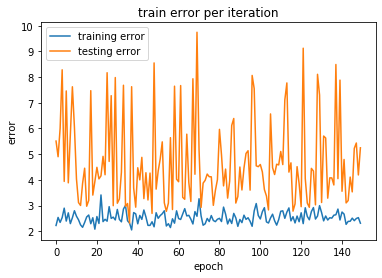

In [6]:

newModel = Sequential()
newModel.add(Dense(3, activation='relu', input_dim=8))
newModel.add(Dense(3, activation='relu'))
newModel.add(Dense(10, activation='softmax'))
#comile the model:
newModel.compile(
  optimizer=opt,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
history = newModel.fit(
  X_train,
  y_train,
  epochs=150,
  batch_size=100, 
  verbose=1,
  validation_split=0.1
)
loss, accuracy = newModel.evaluate(
  X_test,
  y_test
)
print(accuracy)
#now using grid search:
def createNewModel(i,j):
    modelSearch = Sequential()
    for nodes in range(0,j+1):
        modelSearch.add(Dense(i, activation='relu'))
    modelSearch.add(Dense(10, activation='softmax'))
    modelSearch.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    modelSearch.fit(
      X_train,
      y_train,
      epochs=150,
      batch_size=100,
      verbose=1,
      validation_split=0.1,
      callbacks=[callback]
    )
    loss, accuracy = modelSearch.evaluate(
      X_test,
      y_test
    )
    print('Loss: %.2f' % loss)
    print("Accuracy %.2f" %(accuracy))
for i in range(1,4):
    for j in range(3,13):
        if(j%3 == 0):
            createNewModel(i,j)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train error per iteration')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['training error', 'testing error'], loc='upper left')
plt.show()